In [49]:
# import dependencies
import os
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import time
import datetime
import json
import requests as req
from citipy import citipy
from itertools import cycle, islice

In [105]:
# get dataset, created a smaller random sample of dataset called 'flights_smaller.csv that has 100,000 rows
flights_dataset_path = os.path.join('Data', 'flights_smaller.csv')
airlines_dataset_path = os.path.join('Data', 'airlines.csv')
dataset = pd.read_csv(flights_dataset_path)
airport_data = json.load(open('Data/airports.json', 'r'))
airlines = pd.read_csv(airlines_dataset_path)

In [113]:
# convert to dataframe
flight_df = pd.DataFrame(dataset)
airlines_df = pd.DataFrame(airlines)
#Subsetting the data to ATL, LAX, ORD, DFW, JFK, DEN, SFO, LAS, CLT, SEA airports
flight_df = flight_df.loc[(flight_df['ORIGIN_AIRPORT'] == 'ATL') | (flight_df['ORIGIN_AIRPORT'] == 'LAX') | 
                           (flight_df['ORIGIN_AIRPORT'] == 'ORD') | (flight_df['ORIGIN_AIRPORT'] == 'DFW') |
                           (flight_df['ORIGIN_AIRPORT'] == 'JFK') | (flight_df['ORIGIN_AIRPORT'] == 'DEN') |
                           (flight_df['ORIGIN_AIRPORT'] == 'SFO') | (flight_df['ORIGIN_AIRPORT'] == 'LAS') |
                           (flight_df['ORIGIN_AIRPORT'] == 'CLT') | (flight_df['ORIGIN_AIRPORT'] == 'SEA')]
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DELAYED,AIRLINE_NAME,DATE,UNIX_TIME,ORIGIN_LAT,ORIGIN_LON,ORIGIN_CITY,DEST_LAT,DEST_LON,DEST_CITY
0,2015,1,29,4,OO,5362,N941SW,LAX,SBA,1252,...,,,,,,,,,,
3,2015,12,20,7,AS,617,N792AS,LAS,SEA,915,...,,,,,,,,,,
9,2015,12,1,2,OO,4523,N427SW,ATL,CHO,1037,...,,,,,,,,,,
13,2015,6,6,6,UA,1094,N69804,LAX,EWR,2123,...,,,,,,,,,,
17,2015,8,5,3,WN,879,N8608N,LAS,SNA,2020,...,,,,,,,,,,


In [114]:
# add delayed column to show if flight was delayed (1) or not (0)
flight_df['DELAYED'] = ''
flight_df['AIRLINE_NAME'] = ''
# add column for the date
flight_df['DATE'] = ''
# create column for unix timestamp
flight_df['UNIX_TIME'] = ''
# columns for lat and lon
flight_df['ORIGIN_LAT'] = ''
flight_df['ORIGIN_LON'] = ''
flight_df['ORIGIN_CITY'] = ''
flight_df['DEST_LAT'] = ''
flight_df['DEST_LON'] = ''
flight_df['DEST_CITY'] = ''
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DELAYED,AIRLINE_NAME,DATE,UNIX_TIME,ORIGIN_LAT,ORIGIN_LON,ORIGIN_CITY,DEST_LAT,DEST_LON,DEST_CITY
0,2015,1,29,4,OO,5362,N941SW,LAX,SBA,1252,...,,,,,,,,,,
3,2015,12,20,7,AS,617,N792AS,LAS,SEA,915,...,,,,,,,,,,
9,2015,12,1,2,OO,4523,N427SW,ATL,CHO,1037,...,,,,,,,,,,
13,2015,6,6,6,UA,1094,N69804,LAX,EWR,2123,...,,,,,,,,,,
17,2015,8,5,3,WN,879,N8608N,LAS,SNA,2020,...,,,,,,,,,,


In [115]:
# set Delayed column if flight was delayed
for index, row in flight_df.head(30).iterrows():
    # TODO: check if other columns are also null
    if(pd.isnull(row['AIR_SYSTEM_DELAY']) == False):
        flight_df.set_value(index, 'DELAYED', 1)
    
    date = str(row['MONTH']) + '/' + str(row['DAY']) + '/' + str(row['YEAR'])
    
    flight_df.set_value(index, 'DATE', date)

In [116]:
for index, row in flight_df.head(30).iterrows():
    unix_time = time.mktime(datetime.datetime.strptime(row['DATE'], "%m/%d/%Y").timetuple())
    
    flight_df.set_value(index, 'UNIX_TIME', int(unix_time))

In [117]:
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DELAYED,AIRLINE_NAME,DATE,UNIX_TIME,ORIGIN_LAT,ORIGIN_LON,ORIGIN_CITY,DEST_LAT,DEST_LON,DEST_CITY
0,2015,1,29,4,OO,5362,N941SW,LAX,SBA,1252,...,,,1/29/2015,1422511200,,,,,,
3,2015,12,20,7,AS,617,N792AS,LAS,SEA,915,...,,,12/20/2015,1450591200,,,,,,
9,2015,12,1,2,OO,4523,N427SW,ATL,CHO,1037,...,1,,12/1/2015,1448949600,,,,,,
13,2015,6,6,6,UA,1094,N69804,LAX,EWR,2123,...,,,6/6/2015,1433566800,,,,,,
17,2015,8,5,3,WN,879,N8608N,LAS,SNA,2020,...,,,8/5/2015,1438750800,,,,,,


In [118]:
# get average stats for each airline
avg_airline_stats_df = flight_df.groupby('AIRLINE').mean()

In [119]:
# remove unecessary columns that don't need averaged
avg_airline_stats_df.drop(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'SCHEDULED_TIME', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED'], axis=1, inplace=True)

In [120]:
# sort by the average arrival delay from longest avg delay to shortest avg delay
avg_airline_stats_df.reset_index(level=0, inplace=True)
avg_airline_stats_df.sort_values('ARRIVAL_DELAY', ascending=False)

,AIRLINE,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
8,NK,21.322485,15.492604,160.561481,136.235556,1049.777616,8.977778,19.422222,25.962963,0.263374,15.366255,22.555556,0.279835
5,F9,14.759494,16.015471,151.114245,126.598025,975.324476,8.526020,14.612130,21.320574,0.000000,13.693780,26.239234,1.880383
6,HA,1.740000,15.520000,377.920000,352.480000,2726.300000,9.920000,9.660000,0.000000,0.000000,21.125000,16.375000,0.000000
4,EV,11.289199,18.778553,88.754816,64.948774,426.548387,5.012675,9.238616,11.162698,0.000000,26.400794,21.246032,1.771825
9,OO,11.200534,19.992318,103.395029,77.859590,524.867517,5.573150,9.063487,7.878832,0.078832,19.600000,27.687591,2.601460
13,WN,13.929959,13.592176,127.015132,107.538600,812.277048,5.886387,7.682483,6.606335,0.032805,17.384615,27.480769,2.419683
7,MQ,11.388642,18.828218,85.064580,61.274714,401.622077,4.961806,7.072529,11.850972,0.168467,16.034557,20.904968,8.933045
10,UA,14.883542,17.911136,191.144286,165.305714,1314.376263,7.938997,6.269714,11.340881,0.000000,21.611321,22.871698,3.026415
2,B6,11.452335,22.641051,200.945366,172.380488,1309.086372,5.972763,4.989268,13.948498,0.665236,17.283262,25.330472,1.077253
0,AA,9.825406,18.270480,171.735800,145.503238,1105.471664,8.003876,4.271785,12.835807,0.087199,19.880334,20.186456,4.191095


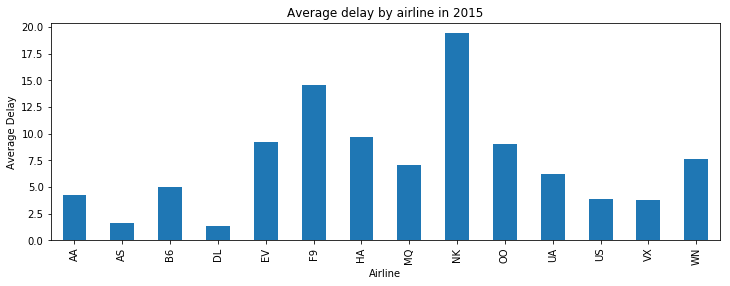

In [121]:
#bar chart of delays by airline.  TODO: creat a color for each and 
avg_airline_stats_df.plot(x = 'AIRLINE', y = 'ARRIVAL_DELAY', kind='bar', figsize = (12,4), legend=False)
plt.title("Average delay by airline in 2015")
plt.xlabel("Airline")
plt.ylabel("Average Delay")
plt.show()

In [122]:
# get average stats for each month
avg_month_stats_df = flight_df.groupby('MONTH').mean()
avg_month_stats_df.drop(['YEAR', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'SCHEDULED_TIME', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED'], axis=1, inplace=True)
avg_month_stats_df.reset_index(level=0, inplace=True)
avg_month_stats_df.sort_values('MONTH', ascending=True)

,MONTH,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,1,11.167407,17.650111,143.843750,119.894717,889.026773,6.309550,7.611607,11.363636,0.087827,19.523883,18.041602,3.963020
1,2,12.758593,18.346683,143.793439,118.820980,880.226140,6.617409,9.599028,13.377451,0.101307,17.733660,21.741830,4.627451
2,3,10.656566,17.347387,144.549301,120.643007,902.950736,6.571528,5.970280,11.153213,0.008237,19.477759,19.619440,2.495881
3,4,9.637624,17.269655,147.777659,124.100999,926.588173,6.407473,3.710207,10.726378,0.000000,21.944882,20.994094,3.127953
4,5,10.634397,17.944326,148.982924,124.398790,926.390833,6.667730,5.409107,12.975352,0.000000,16.904930,22.734155,4.961268
5,6,15.609987,18.437395,150.202373,124.907797,940.077638,6.868963,10.553898,12.633333,0.026667,19.641333,24.052000,4.420000
6,7,12.620550,18.538149,144.525705,119.067712,894.723807,6.955882,7.113166,12.271307,0.086648,18.505682,25.598011,1.718750
7,8,10.844756,18.046267,146.487032,121.740634,917.992405,6.750399,4.688120,12.028526,0.167987,18.998415,21.622821,2.331220
8,9,5.723597,17.779366,146.304151,121.823160,920.465205,6.729174,-0.240321,11.865672,0.000000,17.320896,21.694030,1.753731
9,11,8.431162,17.441155,146.347439,122.146993,920.225842,6.783253,2.927246,11.472350,0.073733,19.177419,23.500000,5.709677


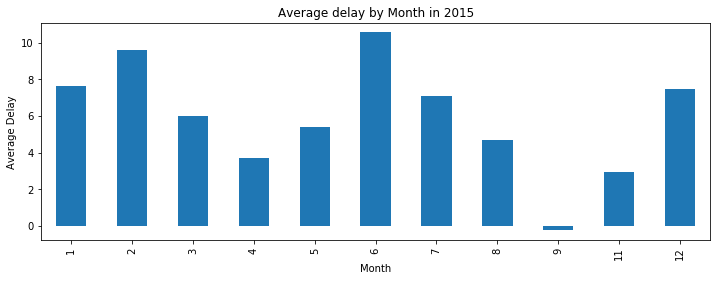

In [123]:
#bar chart of delays by month.  TODO: creat a color for each and figure out why october isnt in there
avg_month_stats_df.plot(x = 'MONTH', y = 'ARRIVAL_DELAY', kind='bar', figsize = (12,4), legend=False)
plt.title("Average delay by Month in 2015")
plt.xlabel("Month")
plt.ylabel("Average Delay")
plt.show()

In [124]:
# get average stats for each day
avg_day_stats_df = flight_df.groupby('DAY_OF_WEEK').mean()
avg_day_stats_df.drop(['YEAR', 'DAY', 'MONTH', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'SCHEDULED_TIME', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED'], axis=1, inplace=True)
avg_day_stats_df.reset_index(level=0, inplace=True)
avg_day_stats_df.sort_values('DAY_OF_WEEK', ascending=False)

,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
6,7,11.024829,17.713537,145.326181,120.859165,904.533661,6.759061,5.770372,11.853838,0.088328,18.664564,21.781283,1.976866
5,6,10.178489,17.072765,148.046494,124.379142,937.266650,6.592716,3.847932,12.430014,0.115440,23.401154,20.646465,6.178932
4,5,10.635875,18.037180,147.504850,122.675146,921.661067,6.794795,5.834016,10.979145,0.000000,18.796663,22.552659,2.667362
3,4,11.915769,18.428289,145.701898,120.583407,900.291287,6.705171,7.606575,13.087702,0.049395,18.502016,23.955645,3.086694
2,3,10.125214,17.842735,147.986066,123.664737,927.369189,6.519683,4.758628,11.570346,0.053030,18.845238,22.411255,2.274892
1,2,10.426138,17.715247,145.280414,120.909827,903.038955,6.672278,5.223746,11.570961,0.126638,17.796943,20.652838,4.474891
0,1,12.651278,18.046472,144.610030,119.916775,894.243963,6.686503,7.695633,12.255902,0.094429,18.123702,23.799811,4.059490


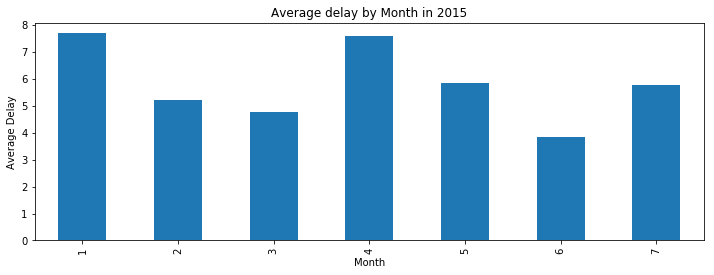

In [125]:
#bar chart of delays by month.  TODO: creat a color for each and 
avg_day_stats_df.plot(x = 'DAY_OF_WEEK', y = 'ARRIVAL_DELAY', kind='bar', figsize = (12,4), legend=False)
plt.title("Average delay by Day in 2015")
plt.xlabel("Day")
plt.ylabel("Average Delay")
plt.show()

In [126]:
avg_airport_stats_df = flight_df.groupby('ORIGIN_AIRPORT').mean()
avg_airport_stats_df.drop(['YEAR', 'DAY', 'MONTH', 'FLIGHT_NUMBER', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'WHEELS_OFF', 'SCHEDULED_TIME', 'WHEELS_ON', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'DIVERTED', 'CANCELLED'], axis=1, inplace=True)
avg_airport_stats_df.reset_index(level=0, inplace=True)
avg_airport_stats_df.sort_values('ORIGIN_AIRPORT', ascending=False)

,ORIGIN_AIRPORT,DAY_OF_WEEK,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,AIR_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
9,SFO,3.991845,10.983852,17.431272,174.869565,149.786166,1204.143689,7.657604,5.428063,7.866157,0.078394,18.560229,28.147228,1.051625
8,SEA,4.034465,6.621827,16.550254,184.708461,161.354230,1281.065890,6.800914,2.827727,12.040816,0.002915,17.810496,14.787172,1.705539
7,ORD,3.906269,14.046727,19.519588,126.927182,101.063922,710.139104,6.399628,8.279065,13.976089,0.048676,17.634500,22.491033,6.508113
6,LAX,3.921689,10.706300,16.804509,178.881203,155.130273,1247.676660,6.981441,5.794045,9.576865,0.042618,18.123288,26.759513,0.674277
5,LAS,3.917019,12.166311,14.591471,148.831341,127.174637,1007.496190,7.070392,7.442784,12.048170,0.000000,18.691715,25.522158,2.013487
4,JFK,3.937616,11.469401,26.726814,227.274968,193.301517,1385.880173,7.273186,3.120101,18.137931,0.500000,20.364943,20.525862,3.204023
3,DFW,3.947255,10.921569,17.260859,130.787841,106.933054,779.498568,6.598427,6.709574,10.202867,0.091510,20.024256,19.868798,4.730981
2,DEN,3.915060,13.051345,16.045858,138.539877,115.671472,883.554217,6.825887,8.718098,12.614474,0.038158,18.356579,25.826316,2.386842
1,CLT,3.952353,9.148170,19.419568,133.391827,106.952524,737.801668,7.078726,6.429087,13.239554,0.033426,21.924791,15.738162,1.966574
0,ATL,3.895138,8.986065,17.556543,114.434463,91.085460,633.519640,5.790933,2.813177,11.694598,0.058434,19.966924,19.674752,4.533627


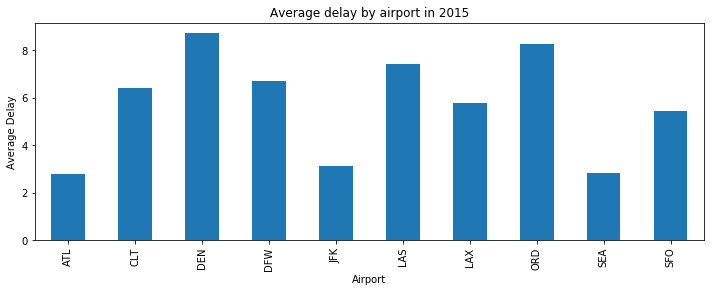

In [128]:
#bar chart of delays by airport.  TODO: creat a color for each and 
avg_airport_stats_df.plot(x = 'ORIGIN_AIRPORT', y = 'ARRIVAL_DELAY', kind='bar', figsize = (12,4), legend=False)
plt.title("Average delay by airport in 2015")
plt.xlabel("Airport")
plt.ylabel("Average Delay")
plt.show()

In [88]:
# TODO: loop through all rows and get lat/lon
# TODO: use this info to get the weather for that airport on that day
# USE JSON TO GET CITY NAME, DONT NEED LAT & LON
#for index, row in flight_df.iterrows():
#    for key in airport_data:
#        if key['code'] == row['ORIGIN_AIRPORT']:
#            #city.append(key['city'])
#            flight_df.loc[index, 'origin_city'] = key['city']
#            break


In [101]:
airport_city_code = {}
for key in airport_data:
    airport_city_code[key['code']] = key['city']

airport_city_code['JFK']

'Jamaica'

In [110]:
def get_city_from(airport_code):
    return airport_city_code.get(airport_code, "N/A")

flight_df['ORIGIN_AIRPORT'].head().apply(get_city_from)

0        Anchorage
1      Los Angeles
2    San Francisco
3      Los Angeles
4          Seattle
Name: ORIGIN_AIRPORT, dtype: object

In [111]:
flight_df['origin_city'] = flight_df['ORIGIN_AIRPORT'].apply(get_city_from)

In [112]:
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,Delayed,Date,Unix Time,origin_lat,origin_lon,origin_city,dest_lat,dest_lon,dest_city
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,,1/1/2015,1420092000,,,Anchorage,,,
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,,1/1/2015,1420092000,,,Los Angeles,,,
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,,1/1/2015,1420092000,,,San Francisco,,,
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,,1/1/2015,1420092000,,,Los Angeles,,,
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,,1/1/2015,1420092000,,,Seattle,,,


In [41]:
for index, row in flight_df.head(29).iterrows():
    try:
        origin_city = citipy.nearest_city(float(row['origin_lat']), float(row['origin_lon']))
        dest_city = citipy.nearest_city(float(row['dest_lat']), float(row['dest_lon']))
        flight_df.set_value(index, 'origin_city', origin_city.city_name)
        flight_df.set_value(index, 'dest_city', dest_city.city_name)
    except:
        print('error at row ' + str(index))

error at row 0
error at row 1
error at row 2
error at row 3
error at row 4
error at row 5
error at row 6
error at row 7
error at row 8
error at row 9
error at row 10
error at row 11
error at row 12
error at row 13
error at row 14
error at row 15
error at row 16
error at row 17
error at row 18
error at row 19
error at row 20
error at row 21
error at row 22
error at row 23
error at row 24
error at row 25
error at row 26
error at row 27
error at row 28


In [42]:
flight_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,Delayed,Date,Unix Time,origin_lat,origin_lon,origin_city,dest_lat,dest_lon,dest_city
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,,1/1/2015,1420092000,,,,,,
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,NaN,,1/1/2015,1420092000,,,,,,
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,NaN,,1/1/2015,1420092000,,,,,,
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,NaN,,1/1/2015,1420092000,,,,,,
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,NaN,,1/1/2015,1420092000,,,,,,


In [43]:
cities.append(city.city_name)

NameError: name 'cities' is not defined

In [ ]:
weather = req.get(weather_url).json()

In [ ]:
weather